# Coin segmentation tutorial [1] 

## References
1. https://www.youtube.com/watch?v=STnoJ3YCWus

In [3]:
import skimage
skimage.__version__

'0.17.2'

In [4]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
from skimage import data
coins=data.coins()

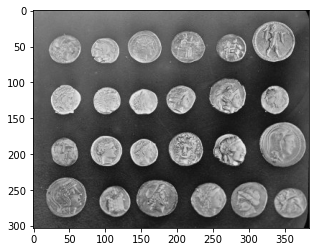

In [6]:
plt.imshow(coins, cmap='gray')

Median filter denoises the image

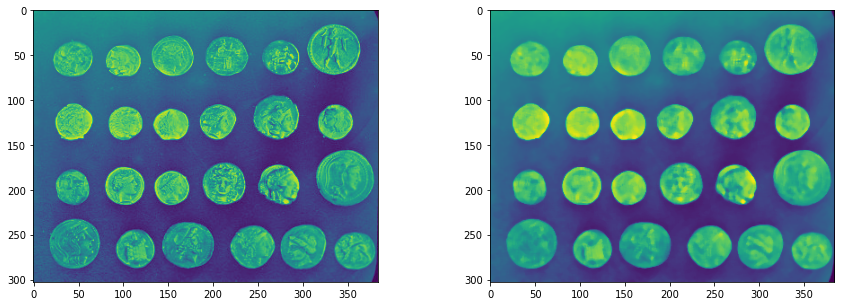

In [10]:
from skimage import filters

coins_denoised = filters.median(coins, selem=np.ones((5, 5)))
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
ax0.imshow(coins)
ax1.imshow(coins_denoised)

Edge filter the image using Canny algorithm [1], [2], sigma is standard deviation

Steps of the algorithm: [3]
1. Smooth the image using a Gaussian with sigma width
2. Apply horizontal and vertical Sobel operators to get the gradients within the image. The edge strengh is the norm of the gradient.
3. Thin potential edges to one pixel wide curves. First, find the normal to the edge at each point. This is done by looking at the signs and the relative magnitude of the X-Sobel and Y-Sobel to sort the points into 4 categories: horizontal, vertical, diagonal and antidiagonal. Then look in the normal and reverse directions to see if the values in these directions are greater than the point in question. Use interpolation to get a mix of points instead of picking the one that is closes to the normal.
4. Perform a hysteresis thresholding: first, label all points above the threshold as edges. Then recursively label every point above the low threshold that is 8-connected to a labeled point as an edge.


## References
1. https://doi.org/10.1109/TPAMI.1986.4767851
2. https://en.wikipedia.org/wiki/Canny_edge_detector
3. https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.canny


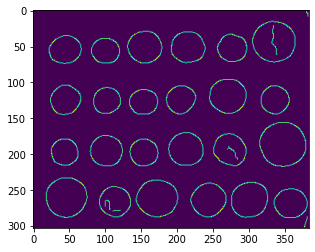

In [11]:
from skimage import feature

edges = feature.canny(coins, sigma=3)

plt.imshow(edges)